# Metric: Walkability
### By Brandon McCoy
Walkability refers to how easy and pleasant it is to walk in a particular area, taking into account factors like pedestrian safety, access to amentities, and sidewalk quality. To help determine this metric, I'm going to use a dataset titled "Allegheny County Walk Scores", which provides a walkscore for each tract based on walking routes to nearby amentities and pedestrian friendliness (which is determined by population density and road metrics like block length and intersection density). 

To get started, lets load in the data and see what we have:


In [69]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

walkscores = pd.read_csv("walkscorect.xls-walk-score-by-ct.csv")

walkscores.head()

,Census Tract,Walk Score
0,10300,82
1,20100,100
2,20300,83
3,30500,77
4,40200,71


While this is helpful, the census tract isn't a great descriptor for the neighborhood. To fix this, lets create a dictionary that maps each tract to it's respective neighborhood name and then combine those into another dataset. This will require another dataset called "2010 Census Tracts". 

In [70]:
tracts = pd.read_csv("9756af5f-3320-4601-84e2-347d64071e25.csv")
tracts.head()

,objectid,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,aland10,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,shape_area,shape_length
0,1,42,3,40500,1,420030405001,Block Group 1,G5030,S,268195,...,7,40500,2,2775,2985,92.964824,92.96,Yes,5.079492e+06,10442.036450
1,2,42,3,40400,1,420030404001,Block Group 1,G5030,S,75472,...,6,40400,2,1365,2020,67.574257,67.57,Yes,2.105489e+06,6609.688123
2,3,42,3,40200,2,420030402002,Block Group 2,G5030,S,282679,...,5,40200,2,1070,1290,82.945736,82.94,Yes,5.998649e+06,18280.484081
3,4,42,3,30500,2,420030305002,Block Group 2,G5030,S,284548,...,4,30500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444
4,5,42,3,980000,1,420039800001,Block Group 1,G5030,S,637235,...,125,980000,1,65,220,29.545455,29.54,No,7.764866e+06,13581.875089


Next, I'm going to create the dictionary that links each tract to it's corresponding neighborhood name

In [71]:
neighborhood_names = zip(tracts.tractce10, tracts.hood)
neighborhood_names = list(test)
neighborhood_names = dict(test)
print(neighborhood_names)

{40500: 'Central Oakland', 40400: 'North Oakland', 40200: 'West Oakland', 30500: 'Crawford-Roberts', 980000: 'Lincoln-Lemington-Belmar', 20300: 'Strip District', 20100: 'Central Business District', 262000: 'Spring Hill-City View', 261500: 'Perry South', 261400: 'Perry South', 261200: 'Summer Hill', 260900: 'Northview Heights', 260700: 'Perry North', 563100: 'Westwood', 562400: 'Beltzhoover', 981000: 'Central Lawrenceville', 170200: 'South Side Flats', 180300: 'Allentown', 170600: 'South Side Slopes', 10300: 'Bluff', 260200: 'Perry North', 180700: 'Mount Washington', 250900: 'Fineview', 562900: 'Hazelwood', 561900: 'Lincoln-Lemington-Belmar', 130600: 'East Hills', 40900: 'South Oakland', 562300: 'Hazelwood', 151700: 'Greenfield', 151600: 'Greenfield', 141400: 'Squirrel Hill South', 141300: 'Squirrel Hill South', 250300: 'Central Northside', 241200: 'Spring Garden', 562000: 'North Oakland', 80900: 'Bloomfield', 240600: 'Troy Hill', 220600: 'Central Northside', 981800: 'Lincoln-Lemington-

Using that dictionary, lets add a "Neighborhood" column into the original dataset using the map function

In [72]:
walkscores['Neighborhood'] = walkscores['Census Tract'].map(neighborhood_names)

walkscores.head(10)

,Census Tract,Walk Score,Neighborhood
0,10300,82,Bluff
1,20100,100,Central Business District
2,20300,83,Strip District
3,30500,77,Crawford-Roberts
4,40200,71,West Oakland
5,40400,82,North Oakland
6,40500,78,Central Oakland
7,40600,75,Central Oakland
8,40900,68,South Oakland
9,50100,60,Middle Hill


Since the orignal dataset on walkability included all neighborhoods in Allegheny County, lets remove the ones outside of city limits since we're focusing on Pittsburgh only. This will be easy to determine since the dataset I used to get the neighborhood names only included the ones inside city limits. When I merged the two, this resulted in the tracts outside of Pittsburgh not having a value in the dictionary, which ended up with some rows in the "Neighborhood" being null. Lets remove those rows.

In [73]:
walkscores = walkscores[walkscores.Neighborhood.notnull()]

We can now sort the dataset in descending order to see which neighborhoods rank highest in walkability

In [78]:
walkscores = walkscores.sort_values(by='Walk Score', ascending=False)
walkscores.head(10)

,Census Tract,Walk Score,Neighborhood
1,20100,100,Central Business District
16,70300,91,Shadyside
14,60300,91,Lower Lawrenceville
20,70900,89,Shadyside
80,220600,89,Central Northside
19,70800,88,Shadyside
17,70500,88,Shadyside
15,60500,88,Polish Hill
55,140800,88,Squirrel Hill South
25,80900,86,Bloomfield


Lets plot the top 15 neighborhoods

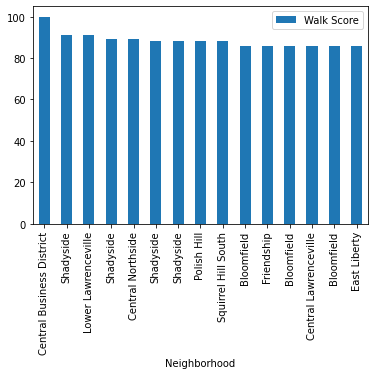

In [83]:
walkscores.head(15).plot.bar(x='Neighborhood', y='Walk Score')